# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Putri Indah Sari
- **Email:** putri04213@gmail.com
- **ID Dicoding:** MC813D5X1836

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan jumlah penyewaan sepeda antara musim panas dan musim dingin dalam tahun 2011-2012, dan faktor apa saja yang berkontribusi terhadap perbedaan tersebut?
- Bagaimana pengaruh hari libur terhadap jumlah penyewaan sepeda pada tahun 2011-2012, dan apakah ada pola tertentu yang dapat diidentifikasi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Wrangling

### Gathering Data

saya mencoba melakukan import data set melalui google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hour_df = pd.read_csv("/content/drive/MyDrive/hour.csv")
day_df = pd.read_csv("/content/drive/MyDrive/day.csv")

data berhasil terupload dan siap untuk dilakukan assesing dan cleaning data.

### Assesing data

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


insight :
- DataFrame ini memiliki 17.379 baris dan 17 kolom.
- Kolom-kolomnya terdiri dari berbagai tipe data, termasuk integer, float, dan object (teks).,
- Tidak ada nilai yang hilang (null) dalam DataFrame ini karena semua kolom memiliki 17.379 nilai non-null.
DataFramenya menggunakan sekitar 2.3 MB memori.

In [5]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


insgiht :tidak ada missing values pada dat hour

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


insight nya :Dataset ini lengkap tidak ada missing values,saya akan coba gunakan untuk analisis time series, pengaruh cuaca, dan prediksi.

In [7]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


insght :tidak ada data duplikat shingga tidak perlu dibersihkan

In [8]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


insight pada data day tidak ada missing values,dan tidak perlu melakukan pembersihan data.

In [9]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())

Jumlah duplikasi:  0


insight data day tidak memiliki jumlah duplikasi untuk dilakukan langkah cleanong data

In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Insight:
- data hour dan day sudah normal tetapi pada tipe data day dan hour ada yang salah,seharusnya dteday tipe datanya date time

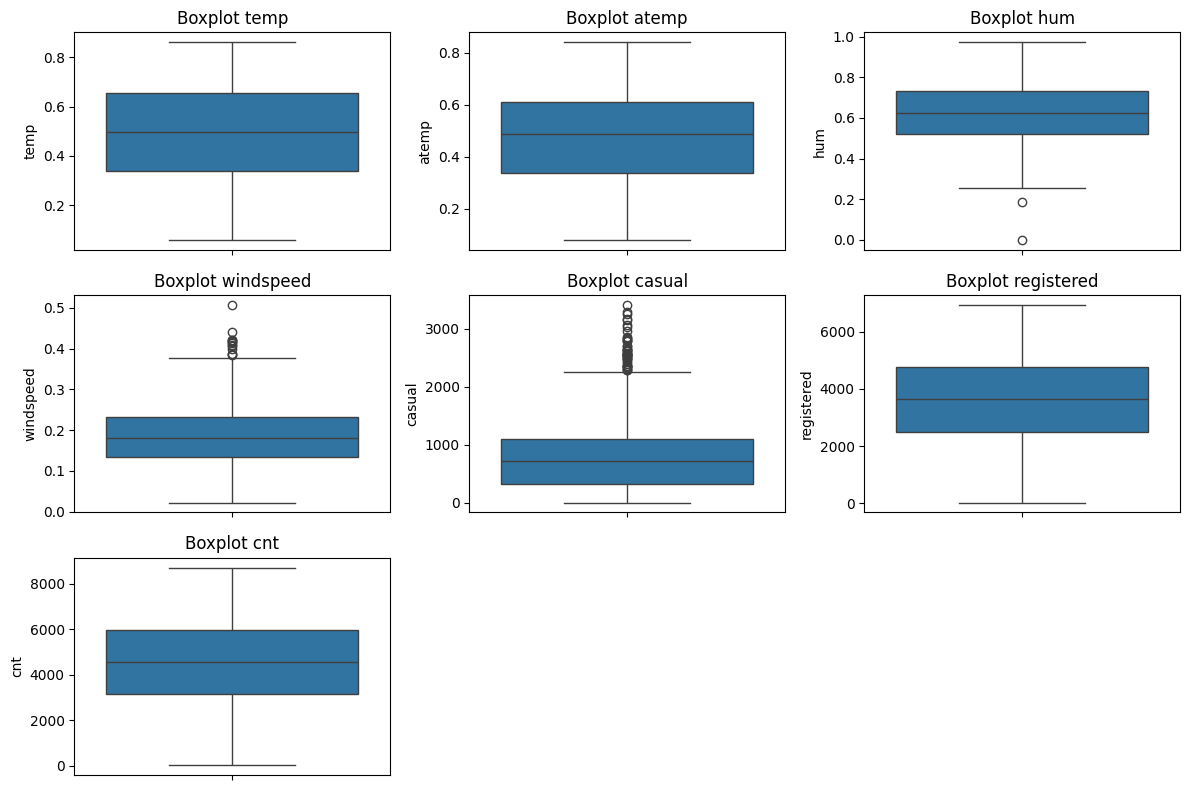

In [12]:
cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(12, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=day_df[col])
    plt.title(f"Boxplot {col}")
plt.tight_layout()
plt.show()

**insight**
- terdapat outlier pada beberapa variabel yang ditunjukan yakni windspeed, casual, dan hum.langkah selanjutnya saya akan mencoba melihat isi dari outlier tersebut untuk menentukan 1.haruskah dihapus atau tetap dipertahankan sebagai data penting

In [13]:
import pandas as pd

# Fungsi deteksi outlier dengan IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
cols_with_outliers = ['windspeed', 'casual', 'hum']
for col in cols_with_outliers:
    print(f"\nOutlier pada kolom {col}:")
    print(detect_outliers_iqr(day_df, col).head())  # Menampilkan beberapa outlier pertama


Outlier pada kolom windspeed:
     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
44        45  2011-02-14       1   0     2        0        1           1   
49        50  2011-02-19       1   0     2        0        6           0   
93        94  2011-04-04       2   0     4        0        1           1   
94        95  2011-04-05       2   0     4        0        2           1   
292      293  2011-10-20       4   0    10        0        4           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
44            1  0.415000  0.398350  0.375833   0.417908     208        1705   
49            1  0.399167  0.391404  0.187917   0.507463     532        1103   
93            1  0.573333  0.542929  0.426250   0.385571     734        2381   
94            2  0.414167  0.398350  0.642083   0.388067     167        1628   
292           1  0.475833  0.466525  0.636250   0.422275     471        3724   

      cnt  
44   1913  
49   16

**insight:**
- outlier pada windspeed : nilai tertinggi seperti 0.507463 menunjukan angin sangat kencang ini bisa jadi,sehingga jika kecepatan angin berpengaruh signifikan pada jumlah penyewaan sepeda ,maka saya tetap akan mempertahankan nilai tersebut.
- outlier pada casual : nilai tertinggi 3065  menunjukkan hari dengan banyak penyewa sepeda yang bukan member (casual),bisa jadi terdapat event khusus atau akhir pekan yang sibuk .ini merupakan insight penting untuk menunjukkan tren penggunaan sepeda oleh pengguna
- outlier pada hum : terdapat nilai 0.00000 ini bisa jadi kesalahan data atau missing value yang diisi dengan nol(saya akan mengganti dengan nilai median untuk mengganti nilai tidak realistis tersebut)

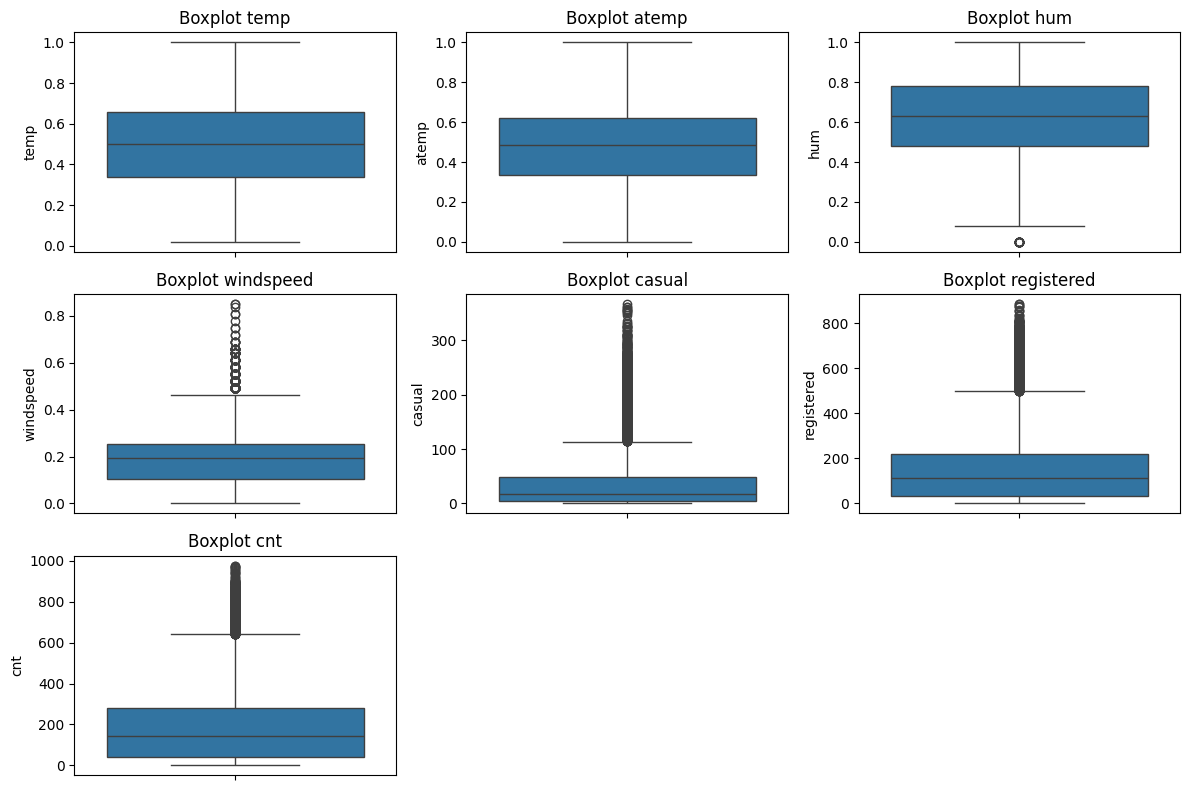

In [14]:
cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(12, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=hour_df[col])
    plt.title(f"Boxplot {col}")
plt.tight_layout()
plt.show()

insight : tedapat bebarapa outlier pada beberapa  kolom cnt,windspeet,casual,registered namun outlier tersebut tetap diperlukan

In [15]:
import pandas as pd

# Daftar kolom yang akan dicek outliernya
columns_with_outliers = ['windspeed', 'casual', 'registered', 'cnt']

# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Menampilkan outlier untuk setiap kolom
for col in columns_with_outliers:
    outliers = detect_outliers_iqr(hour_df, col)
    print(f"Outlier pada kolom {col}:")
    display(outliers)  # Jika di Jupyter Notebook
    print(outliers)  # Jika di terminal
    print("\n" + "-"*50 + "\n")

Outlier pada kolom windspeed:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
175,176,2011-01-08,1,0,1,14,0,6,0,1,0.20,0.1667,0.32,0.4925,12,83,95
178,179,2011-01-08,1,0,1,17,0,6,0,1,0.16,0.1212,0.37,0.5522,5,64,69
194,195,2011-01-09,1,0,1,9,0,0,0,1,0.12,0.0758,0.46,0.5224,0,19,19
196,197,2011-01-09,1,0,1,11,0,0,0,1,0.16,0.1212,0.40,0.5224,2,47,49
265,266,2011-01-12,1,0,1,12,0,3,1,1,0.20,0.1515,0.47,0.5821,3,52,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17327,17328,2012-12-29,1,1,12,20,0,6,0,2,0.30,0.2424,0.56,0.5522,2,64,66
17328,17329,2012-12-29,1,1,12,21,0,6,0,2,0.28,0.2424,0.56,0.4925,4,56,60
17341,17342,2012-12-30,1,1,12,10,0,0,0,1,0.26,0.2121,0.41,0.5821,31,91,122
17343,17344,2012-12-30,1,1,12,12,0,0,0,1,0.28,0.2273,0.36,0.5821,47,97,144


       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
175        176  2011-01-08       1   0     1  14        0        6   
178        179  2011-01-08       1   0     1  17        0        6   
194        195  2011-01-09       1   0     1   9        0        0   
196        197  2011-01-09       1   0     1  11        0        0   
265        266  2011-01-12       1   0     1  12        0        3   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17327    17328  2012-12-29       1   1    12  20        0        6   
17328    17329  2012-12-29       1   1    12  21        0        6   
17341    17342  2012-12-30       1   1    12  10        0        0   
17343    17344  2012-12-30       1   1    12  12        0        0   
17344    17345  2012-12-30       1   1    12  13        0        0   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
175             0           1  0.20  0.1667  0.32     0.4925      12   
178            

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1633,1634,2011-03-13,1,0,3,14,0,0,0,1,0.46,0.4545,0.41,0.2985,144,106,250
1634,1635,2011-03-13,1,0,3,15,0,0,0,1,0.48,0.4697,0.39,0.3284,149,155,304
1635,1636,2011-03-13,1,0,3,16,0,0,0,1,0.46,0.4545,0.41,0.3881,124,132,256
1771,1772,2011-03-19,1,0,3,12,0,6,0,1,0.46,0.4545,0.33,0.4179,126,141,267
1772,1773,2011-03-19,1,0,3,13,0,6,0,1,0.50,0.4848,0.34,0.4627,174,127,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16817,16818,2012-12-08,4,1,12,12,0,6,0,2,0.40,0.4091,0.87,0.2239,122,364,486
16818,16819,2012-12-08,4,1,12,13,0,6,0,2,0.40,0.4091,0.87,0.1642,148,399,547
16819,16820,2012-12-08,4,1,12,14,0,6,0,2,0.40,0.4091,0.87,0.2836,164,378,542
16820,16821,2012-12-08,4,1,12,15,0,6,0,1,0.42,0.4242,0.82,0.1642,167,374,541


       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
1633      1634  2011-03-13       1   0     3  14        0        0   
1634      1635  2011-03-13       1   0     3  15        0        0   
1635      1636  2011-03-13       1   0     3  16        0        0   
1771      1772  2011-03-19       1   0     3  12        0        6   
1772      1773  2011-03-19       1   0     3  13        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
16817    16818  2012-12-08       4   1    12  12        0        6   
16818    16819  2012-12-08       4   1    12  13        0        6   
16819    16820  2012-12-08       4   1    12  14        0        6   
16820    16821  2012-12-08       4   1    12  15        0        6   
16821    16822  2012-12-08       4   1    12  16        0        6   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
1633            0           1  0.46  0.4545  0.41     0.2985     144   
1634           

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2995,2996,2011-05-09,2,0,5,17,0,1,1,1,0.62,0.6212,0.38,0.2537,59,539,598
3019,3020,2011-05-10,2,0,5,17,0,2,1,1,0.64,0.6212,0.33,0.0000,79,532,611
3067,3068,2011-05-12,2,0,5,17,0,4,1,2,0.64,0.6212,0.57,0.1940,54,540,594
3187,3188,2011-05-17,2,0,5,17,0,2,1,1,0.62,0.6061,0.65,0.4179,83,521,604
3379,3380,2011-05-25,2,0,5,17,0,3,1,1,0.74,0.6667,0.51,0.2239,77,524,601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17063,17064,2012-12-18,4,1,12,18,0,2,1,1,0.38,0.3939,0.46,0.3284,13,512,525
17077,17078,2012-12-19,4,1,12,8,0,3,1,1,0.24,0.2576,0.87,0.1045,13,665,678
17086,17087,2012-12-19,4,1,12,17,0,3,1,1,0.40,0.4091,0.50,0.3881,26,536,562
17087,17088,2012-12-19,4,1,12,18,0,3,1,1,0.38,0.3939,0.50,0.3582,23,546,569


       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
2995      2996  2011-05-09       2   0     5  17        0        1   
3019      3020  2011-05-10       2   0     5  17        0        2   
3067      3068  2011-05-12       2   0     5  17        0        4   
3187      3188  2011-05-17       2   0     5  17        0        2   
3379      3380  2011-05-25       2   0     5  17        0        3   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17063    17064  2012-12-18       4   1    12  18        0        2   
17077    17078  2012-12-19       4   1    12   8        0        3   
17086    17087  2012-12-19       4   1    12  17        0        3   
17087    17088  2012-12-19       4   1    12  18        0        3   
17101    17102  2012-12-20       4   1    12   8        0        4   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
2995            1           1  0.62  0.6212  0.38     0.2537      59   
3019           

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5536,5537,2011-08-23,3,0,8,14,0,2,1,1,0.72,0.6515,0.30,0.0896,149,502,651
10358,10359,2012-03-12,1,1,3,17,0,1,1,2,0.62,0.6212,0.38,0.4179,87,557,644
10359,10360,2012-03-12,1,1,3,18,0,1,1,2,0.60,0.6212,0.43,0.1940,89,623,712
10382,10383,2012-03-13,1,1,3,17,0,2,1,1,0.70,0.6364,0.37,0.1045,62,614,676
10383,10384,2012-03-13,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,16886,2012-12-11,4,1,12,8,0,2,1,2,0.34,0.3030,0.61,0.2985,16,708,724
16909,16910,2012-12-12,4,1,12,8,0,3,1,2,0.26,0.2576,0.65,0.1642,18,670,688
16933,16934,2012-12-13,4,1,12,8,0,4,1,1,0.24,0.2273,0.60,0.1940,24,655,679
17053,17054,2012-12-18,4,1,12,8,0,2,1,1,0.38,0.3939,0.94,0.0000,10,652,662


       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
5536      5537  2011-08-23       3   0     8  14        0        2   
10358    10359  2012-03-12       1   1     3  17        0        1   
10359    10360  2012-03-12       1   1     3  18        0        1   
10382    10383  2012-03-13       1   1     3  17        0        2   
10383    10384  2012-03-13       1   1     3  18        0        2   
...        ...         ...     ...  ..   ...  ..      ...      ...   
16885    16886  2012-12-11       4   1    12   8        0        2   
16909    16910  2012-12-12       4   1    12   8        0        3   
16933    16934  2012-12-13       4   1    12   8        0        4   
17053    17054  2012-12-18       4   1    12   8        0        2   
17077    17078  2012-12-19       4   1    12   8        0        3   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
5536            1           1  0.72  0.6515  0.30     0.0896     149   
10358          

insight : Lonjakan jumlah pengguna kasual menunjukkan adanya pola musiman atau kejadian spesifik yang meningkatkan permintaan sepeda. Hal ini bisa dimanfaatkan untuk strategi pemasaran seperti diskon di hari libur atau promosi event tertentu,sehingga saya memilih untuk mempertahankan outlier tersebut tanpa proses cleaning lanjutan.



### Cleaning Data

In [16]:
day_df_clean = day_df[day_df['hum'] > 0].copy()
day_df['hum'] = day_df['hum'].replace(0, day_df['hum'].median())

print(f"Jumlah data setelah pembersihan: {len(day_df_clean)}")

Jumlah data setelah pembersihan: 730


**insight**:

Mengganti nilai 0 pada hum dengan median dari kolom tersebut.

In [17]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [18]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [19]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [20]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Insight:

- menganti tipe data data hour dan day menjadi datetime

## Exploratory Data Analysis (EDA)

- Bagaimana perbedaan jumlah penyewaan sepeda antara musim panas dan musim dingin dalam tahun 2011-2012, dan faktor apa saja yang berkontribusi terhadap perbedaan tersebut?
- Bagaimana pengaruh hari libur terhadap jumlah penyewaan sepeda pada tahun 2011-2012, dan apakah ada pola tertentu yang dapat diidentifikasi?

# eksplore pertanyaan 1:

Analisis Perbedaan Penyewaan Sepeda antara Musim Panas dan Musim Dingin tahun 2011 - 2012 dan faktor apa saja yang berkontribusi terhadap perbedaan tersebut?

In [21]:
data_2011_2012 = day_df[(day_df['yr'] == 0) | (day_df['yr'] == 1)]
seasonal_stats = data_2011_2012.groupby('season')['cnt'].describe()
seasonal_stats.index = seasonal_stats.index.map({
    1: 'Musim Dingin',   # Winter
    2: 'Musim Semi',     # Spring
    3: 'Musim Panas',    # Summer
    4: 'Musim Gugur'     # Fall
})
print(seasonal_stats)

              count         mean          std     min     25%     50%  \
season                                                                  
Musim Dingin  181.0  2604.132597  1399.942119   431.0  1538.0  2209.0   
Musim Semi    184.0  4992.331522  1695.977235   795.0  4003.0  4941.5   
Musim Panas   188.0  5644.303191  1459.800381  1115.0  4586.5  5353.5   
Musim Gugur   178.0  4728.162921  1699.615261    22.0  3615.5  4634.5   

                  75%     max  
season                         
Musim Dingin  3456.00  7836.0  
Musim Semi    6377.00  8362.0  
Musim Panas   6929.25  8714.0  
Musim Gugur   5624.50  8555.0  


insight

- Musim Panas Memiliki Jumlah Penyewaan Tertinggi
Rata-rata penyewaan tertinggi terjadi di musim panas (5.644 sepeda/hari), dengan penyewaan maksimum 8.714 sepeda/hari.
- Rata-rata penyewaan di musim dingin jauh lebih rendah (2.604 sepeda/hari) dibandingkan musim lainnya.Standar deviasi (1.399 sepeda) menunjukkan bahwa ada variasi yang cukup besar—beberapa hari memiliki penyewaan sangat rendah (minimal 431 sepeda/hari)
- Pada musim semi penyewaan sepeda cukup tinggi (4.992 sepeda/hari), mungkin karena cuaca mulai membaik setelah musim dingin.
- Musim Gugur: Penyewaan sepeda sedikit menurun dibandingkan musim panas (4.728 sepeda/hari), tetapi masih lebih tinggi dari musim dingin.

**Penyebaran Data Menunjukkan Variasi Penyewaan** :

Musim Gugur memiliki standar deviasi tertinggi (1.699 sepeda), menunjukkan bahwa jumlah penyewaan sangat bervariasi—mungkin dipengaruhi oleh kondisi cuaca yang tidak menentu.

Musim Panas memiliki median penyewaan tertinggi (5.353 sepeda/hari), menunjukkan bahwa sebagian besar hari dalam musim panas memiliki jumlah penyewaan yang cukup tinggi.

In [22]:
data_2011_2012 = hour_df[(hour_df['yr'] == 0) | (hour_df['yr'] == 1)]
seasonal_stats = data_2011_2012.groupby('season')['cnt'].describe()
seasonal_stats.index = seasonal_stats.index.map({
    1: 'Musim Dingin',   # Winter
    2: 'Musim Semi',     # Spring
    3: 'Musim Panas',    # Summer
    4: 'Musim Gugur'     # Fall
})
print(seasonal_stats)

               count        mean         std  min   25%    50%    75%    max
season                                                                      
Musim Dingin  4242.0  111.114569  119.224010  1.0  23.0   76.0  158.0  801.0
Musim Semi    4409.0  208.344069  188.362473  1.0  46.0  165.0  311.0  957.0
Musim Panas   4496.0  236.016237  197.711630  1.0  68.0  199.0  345.0  977.0
Musim Gugur   4232.0  198.868856  182.967972  1.0  46.0  155.5  295.0  967.0


Insight berdasarkan dataset hour.csv:
- Musim panas memiliki rata-rata penyewaan tertinggi (236 sepeda/jam).Jumlah maksimum penyewaan juga paling tinggi (977 sepeda/jam).
- Rata-rata penyewaan di musim dingin hanya 111 sepeda/jam, jauh lebih rendah dibandingkan musim lain.Standar deviasi yang cukup besar (119 sepeda/jam) menunjukkan fluktuasi yang tinggi.Penyewaan minimum bisa turun hingga 1 sepeda/jam, kemungkinan besar saat kondisi cuaca sangat buruk (salju, suhu ekstrem, angin kencang).
- Musim Semi: Rata-rata penyewaan 208 sepeda/jam, lebih tinggi dibandingkan musim gugur.
- Musim Gugur: Rata-rata penyewaan 198 sepeda/jam, sedikit lebih rendah dibanding musim semi.
Keduanya memiliki distribusi penyewaan yang cukup luas (standar deviasi sekitar 182-188 sepeda/jam).

In [23]:
# Menghapus kolom non-numerik sebelum menghitung korelasi
numeric_day_df = day_df.select_dtypes(include=['number'])
numeric_hour_df = hour_df.select_dtypes(include=['number'])

corr_day = numeric_day_df.corr()
corr_hour = numeric_hour_df.corr()

corr_day, corr_hour

(             instant    season        yr      mnth   holiday   weekday  \
 instant     1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
 season      0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
 yr          0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
 mnth        0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
 holiday     0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
 weekday    -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
 workingday -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
 weathersit -0.021477  0.019211 -0.048727  0.043528 -0.034627  0.031087   
 temp        0.150580  0.334315  0.047604  0.220205 -0.028556 -0.000170   
 atemp       0.152638  0.342876  0.046106  0.227459 -0.032507 -0.007537   
 hum         0.008005  0.200008 -0.118269  0.218997 -0.017204 -0.049887   
 windspeed  -0.112620 -0.229046 -0.011817 -0.207502  0.006292  0.014282   
 casual      0.275255  0.

Insight:
1. Korelasi dengan jumlah penyewa sepeda (cnt):
- Suhu (temp dan atemp) memiliki korelasi positif kuat dengan jumlah penyewa sepeda (cnt), sekitar 0.63.(semakin hangat suhu, semakin banyak orang menyewa sepeda.)
- Waktu (hr) juga memiliki korelasi yang cukup tinggi dengan cnt (sekitar 0.39), menunjukkan bahwa ada pola tertentu pada jam-jam tertentu dalam sehari.
- Tahun (yr) memiliki korelasi positif dengan cnt (0.57) = jumlah penyewa meningkat seiring waktu.

2. faktor negatif terhadap jumlah penyewa:
- Kondisi cuaca buruk (weathersit) memiliki korelasi negatif dengan cnt (-0.14 hingga -0.29) = cuaca yang lebih buruk mengurangi jumlah penyewa sepeda
- Kelembaban (hum) memiliki korelasi negatif moderat dengan cnt (-0.11 hingga -0.32), menunjukkan bahwa kelembaban tinggi bisa menurunkan jumlah penyewa.
- Kecepatan angin (windspeed) juga memiliki korelasi negatif dengan cnt (-0.23), meskipun tidak terlalu besar.

3. Perbedaan antara penyewa kasual (casual) dan terdaftar (registered):

- Penyewa kasual memiliki korelasi negatif dengan hari kerja (workingday) (-0.52 hingga -0.30), sedangkan penyewa terdaftar memiliki korelasi positif dengan hari kerja (0.30 hingga 0.13). Ini menunjukkan bahwa penyewa kasual lebih banyak pada akhir pekan atau hari libur, sedangkan penyewa terdaftar lebih stabil dan cenderung menyewa pada hari kerja.
- Penyewa kasual lebih dipengaruhi oleh cuaca dan suhu dibanding penyewa terdaftar



In [24]:
winter_rentals = day_df[day_df['season'] == 1]['cnt']
summer_rentals = day_df[day_df['season'] == 3]['cnt']

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(winter_rentals, summer_rentals, equal_var=False)
print(f"T-Test antara Musim Dingin dan Musim Panas: p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Terdapat perbedaan signifikan dalam penyewaan sepeda antara musim dingin dan musim panas.")
else:
    print("Tidak ada perbedaan signifikan dalam penyewaan sepeda antara musim dingin dan musim panas.")


T-Test antara Musim Dingin dan Musim Panas: p-value = 0.0000
Terdapat perbedaan signifikan dalam penyewaan sepeda antara musim dingin dan musim panas.


**Insight:**
pertanyaan 1
1. Perbedaan Penyewaan Sepeda Musim Panas & Musim Dingin
- Musim panas memiliki jumlah penyewaan tertinggi, dengan rata-rata 5.644 sepeda/hari dan maksimum 8.714 sepeda/hari.
- Musim dingin memiliki jumlah penyewaan terendah, rata-rata 2.604 sepeda/hari, dengan penyewaan minimum 431 sepeda/hari.
- Fluktuasi tinggi di musim dingin: Standar deviasi cukup besar (1.399 sepeda), menunjukkan ada hari-hari dengan penyewaan sangat rendah.
- Musim semi & gugur berada di tengah: Musim semi (4.992 sepeda/hari) dan musim gugur (4.728 sepeda/hari) masih lebih tinggi dibandingkan musim dingin.

2. Faktor-faktor yang mempengaruhi Penyewaan
- Temperatur (temp & atemp) → Korelasi positif yang kuat (~0.63 dengan cnt). Penyewaan meningkat saat suhu lebih hangat, yang menjelaskan mengapa musim panas memiliki jumlah penyewaan tertinggi.
- Cuaca (weathersit) → Korelasi negatif (-0.297). Kondisi cuaca buruk (misalnya hujan atau salju) menurunkan penyewaan.
- Kecepatan Angin (windspeed) → Korelasi negatif (-0.23). Semakin tinggi kecepatan angin, semakin rendah jumlah penyewaan.
- Hari kerja (workingday) → Korelasi lemah dengan cnt (~0.06), tetapi terlihat bahwa penyewaan terdaftar (registered) lebih tinggi pada hari kerja.
- Kelembaban (hum) → Korelasi negatif (-0.10), menunjukkan bahwa kelembaban tinggi bisa sedikit menurunkan jumlah penyewaan.

# eksplore pertanyaan 2 :

Bagaimana pengaruh hari libur terhadap jumlah penyewaan sepeda pada tahun 2011-2012, dan apakah ada pola tertentu yang dapat diidentifikasi?

In [25]:
day_holiday = day_df[day_df['holiday'] == 1]  # hari libur
day_workday = day_df[day_df['holiday'] == 0]  # hari biasa

In [26]:
holiday_stats = day_holiday['cnt'].describe()
workday_stats = day_workday['cnt'].describe()

day_stats_comparison = pd.DataFrame({
    'Bukan Hari Libur': workday_stats,
    'Hari Libur': holiday_stats
})

print("Statistik Deskriptif Penyewaan Sepeda (Data Harian):")
print(day_stats_comparison)

Statistik Deskriptif Penyewaan Sepeda (Data Harian):
       Bukan Hari Libur  Hari Libur
count        710.000000    21.00000
mean        4527.104225  3735.00000
std         1929.013947  2103.35066
min           22.000000  1000.00000
25%         3214.000000  1951.00000
50%         4558.000000  3351.00000
75%         5932.750000  6034.00000
max         8714.000000  7403.00000


<ipython-input-27-444b827a1ce4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=day_df['holiday'], y=day_df['cnt'], palette="pastel")


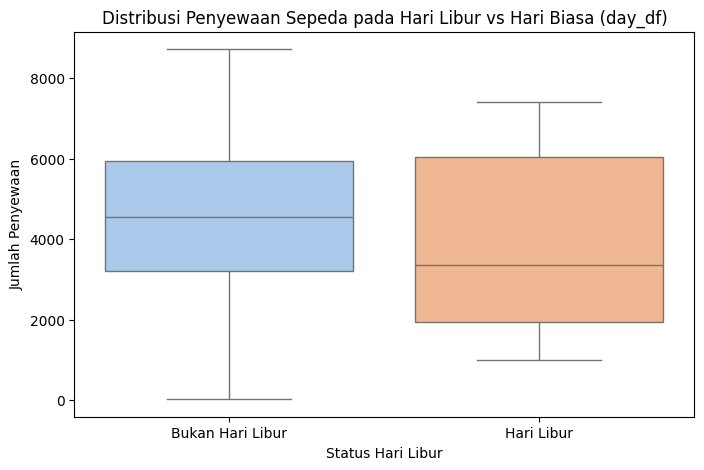

In [27]:
### 2. Pengaruh Hari Libur terhadap Penyewaan Sepeda
plt.figure(figsize=(8, 5))
sns.boxplot(x=day_df['holiday'], y=day_df['cnt'], palette="pastel")
plt.xticks([0, 1], ['Bukan Hari Libur', 'Hari Libur'])
plt.title("Distribusi Penyewaan Sepeda pada Hari Libur vs Hari Biasa (day_df)")
plt.xlabel("Status Hari Libur")
plt.ylabel("Jumlah Penyewaan")
plt.show()

In [28]:
from scipy import stats

day_holiday = day_df[day_df['holiday'] == 0]['cnt']
day_workday = day_df[day_df['holiday'] == 1]['cnt']
t_stat, p_value = stats.ttest_ind(day_holiday, day_workday, equal_var=False)

print("Hasil Independent Samples T-Test:")
print(f"t-statistik: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Signifikan pada α=0.05: {'Ya' if p_value < 0.05 else 'Tidak'}")

Hasil Independent Samples T-Test:
t-statistik: 1.7047
p-value: 0.1030
Signifikan pada α=0.05: Tidak


eksplore data hour

In [30]:
from scipy import stats

day_holiday = hour_df[hour_df['holiday'] == 0]['cnt']
day_workday = hour_df[hour_df['holiday'] == 1]['cnt']
t_stat, p_value = stats.ttest_ind(day_holiday, day_workday, equal_var=False)

print("Hasil Independent Samples T-Test:")
print(f"t-statistik: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Signifikan pada α=0.05: {'Ya' if p_value < 0.05 else 'Tidak'}")

Hasil Independent Samples T-Test:
t-statistik: 4.6942
p-value: 0.0000
Signifikan pada α=0.05: Ya


<ipython-input-31-2b817ca4b80f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='holiday', y='cnt', data=hour_df, palette='Set2')


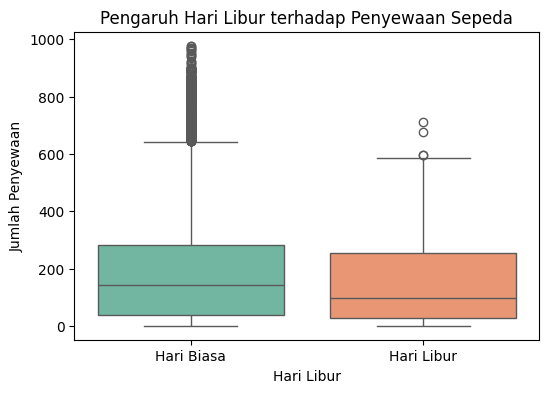

Rata-rata penyewaan pada hari biasa: 190.43
Rata-rata penyewaan pada hari libur: 156.87


In [31]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='holiday', y='cnt', data=hour_df, palette='Set2')
plt.xticks([0, 1], ['Hari Biasa', 'Hari Libur'])
plt.title('Pengaruh Hari Libur terhadap Penyewaan Sepeda')
plt.xlabel('Hari Libur')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Perbedaan rata-rata penyewaan antara hari libur dan hari biasa
avg_rentals = hour_df.groupby('holiday')['cnt'].mean()
print(f"Rata-rata penyewaan pada hari biasa: {avg_rentals[0]:.2f}")
print(f"Rata-rata penyewaan pada hari libur: {avg_rentals[1]:.2f}")


**Insight:**
pertanyaan 2 perbedaan signifikan dalam jumlah penyewaan sepeda dihari biasa dan hari libur/holiday dalam tahun 2011-2012:
1. pada hasil analisis data dapat disimpulkan jika hari libur (holiday) tidak secara signifikan memengaruhi jumlah penyewaan sepeda karena
-  Rata-rata penyewaan sepeda pada hari biasa (190.43) lebih tinggi dibandingkan dengan hari libur (156.87) tidak menunjukan perbedaan signifikan.
- Nilai t-statistik (1.7047) = Nilai positif menunjukkan bahwa rata-rata penyewaan pada hari biasa lebih tinggi daripada hari libur.
- Hasil p-value menunjukan = 0.1030, yang lebih tinggi dari tingkat signifikansi umum 0.05. Ini mengindikasikan bahwa tidak ada perbedaan yang signifikan secara statistik dalam jumlah penyewaan sepeda antara hari libur dan hari biasa.
- Pada hari biasa, rutinitas seperti pergi bekerja atau bersekolah mungkin mendorong orang untuk menyewa sepeda sebagai alat transportasi. Sementara itu, pada hari libur, orang mungkin lebih memilih untuk beristirahat atau melakukan aktivitas lain yang tidak melibatkan bersepeda.
- jika ingin meningkatkan jumlah penyewaan maka tempat penyewaan sepeda harus mempertimbangkan promosi namun  juga tidak perlu mengubah strategi secara drastis berdasarkan status hari (libur atau biasa) karena tidak ada perbedaan signifikan pada penyewaan.

<Figure size 1400x600 with 0 Axes>

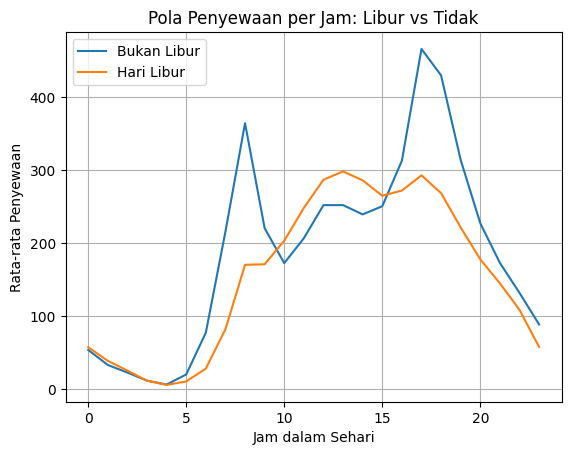

In [32]:
plt.figure(figsize=(14, 6))
hourly_holiday = hour_df.groupby(['hr', 'holiday'])['cnt'].mean().unstack()
hourly_holiday.columns = ['Bukan Libur', 'Hari Libur']
hourly_holiday.plot()
plt.title('Pola Penyewaan per Jam: Libur vs Tidak')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Penyewaan')
plt.grid(True)
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana perbedaan jumlah penyewaan sepeda antara musim panas dan musim dingin dalam tahun 2011-2012, dan faktor apa saja yang berkontribusi terhadap perbedaan tersebut?

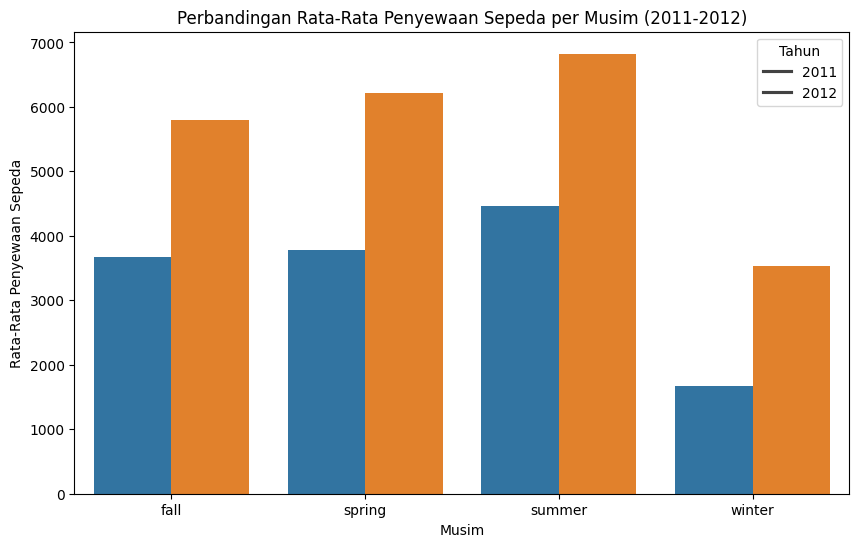

In [33]:
day_df_filtered = day_df[day_df['yr'].isin([0, 1])]  # 0: 2011, 1: 2012

season_mapping = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
day_df_filtered['season_name'] = day_df_filtered['season'].map(season_mapping)
seasonal_avg = day_df_filtered.groupby(['yr', 'season_name'])['cnt'].mean().reset_index()
year_colors = {'0': '#3498db', '1': '#e74c3c'}

# Plot
plt.figure(figsize=(10, 6))

sns.barplot(x='season_name', y='cnt', hue='yr', data=seasonal_avg)
plt.title('Perbandingan Rata-Rata Penyewaan Sepeda per Musim (2011-2012)')
plt.xlabel('Musim')
plt.ylabel('Rata-Rata Penyewaan Sepeda')
plt.legend(title='Tahun', labels=['2011', '2012'])
plt.show()

insight : dalam visualisasi menunjukkan Dari grafik "Perbandingan Rata-Rata Penyewaan Sepeda: Musim Panas vs Dingin (2011-2012)" paling rendah winter dan tertinggi dimusim panas/summer,insight yang saya dapatkan

1. Terdapat kenaikan yang signifikan dalam rata-rata penyewaan sepeda baik pada musim panas maupun musim dingin dari tahun 2011 ke 2012.

2. Rata-rata penyewaan sepeda pada musim panas lebih tinggi dibandingkan musim dingin di kedua tahun, meskipun perbedaannya lebih terlihat pada tahun 2012. Ini mencerminkan preferensi yang konsisten untuk bersepeda di cuaca yang lebih hangat.

3. Peningkatan rata-rata penyewaan dari 2011 ke 2012 tampaknya lebih besar pada musim panas dibandingkan musim dingin. Hal ini menunjukkan bahwa pertumbuhan bisnis lebih diarahkan oleh aktivitas pada musim panas.

4. Pada tahun 2011, perbedaan antara musim panas dan dingin relatif kecil, tetapi pada tahun 2012, kesenjangan ini menjadi lebih lebar. Ini menunjukkan bahwa pengaruh musim terhadap penyewaan sepeda semakin meningkat seiring waktu.

5. Meskipun penyewaan di musim dingin juga meningkat pada 2012, perbedaan yang lebih besar dengan musim panas mungkin menunjukkan peluang untuk strategi khusus musim dingin guna meningkatkan penyewaan selama periode ini.

6. Peningkatan di semua kategori menunjukkan bahwa pasar penyewaan sepeda secara keseluruhan sedang bertumbuh, tidak hanya terbatas pada satu musim saja.


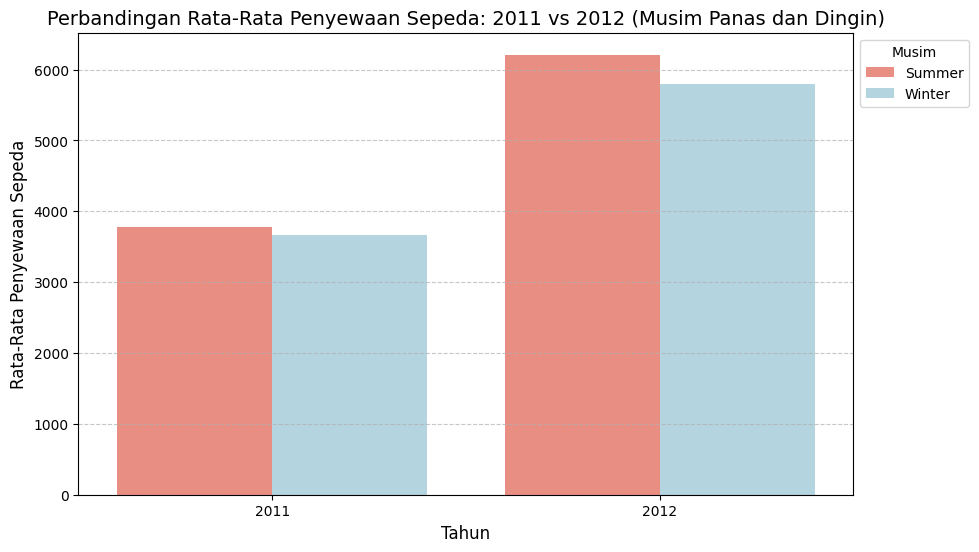

In [34]:
summer_winter_df = day_df[day_df['season'].isin([2, 4]) & day_df['yr'].isin([0, 1])].copy()

# 2. Mapping nilai musim dan tahun
summer_winter_df['season_name'] = summer_winter_df['season'].map({2: 'Summer', 4: 'Winter'})
summer_winter_df['year'] = summer_winter_df['yr'].map({0: '2011', 1: '2012'})

# 3. Hitung rata-rata penyewaan per musim dan tahun
seasonal_avg = summer_winter_df.groupby(['year', 'season_name'])['cnt'].mean().reset_index()

# 4. Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(
    x='year',
    y='cnt',
    hue='season_name',
    data=seasonal_avg,
    palette={'Summer': 'salmon', 'Winter': 'lightblue'}
)

plt.title('Perbandingan Rata-Rata Penyewaan Sepeda: 2011 vs 2012 (Musim Panas dan Dingin)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Rata-Rata Penyewaan Sepeda', fontsize=12)
plt.legend(title='Musim', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

insight: berdasarkan visualisasi dt pertama saya ingin mengambil berdasarkan musim dengan penyewaan paling rendah dan tertinggi,dalam visulisasi terlihat penyewaan sepeda meningkat signifikan dari 2011 ke 2012 dikedua musim
- Musim Panas (Summer):

2011: 3800

2012: 6200
- Musim Dingin (Winter):

2011: 3650

2012: 5800

<ipython-input-35-f855b47ee01a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


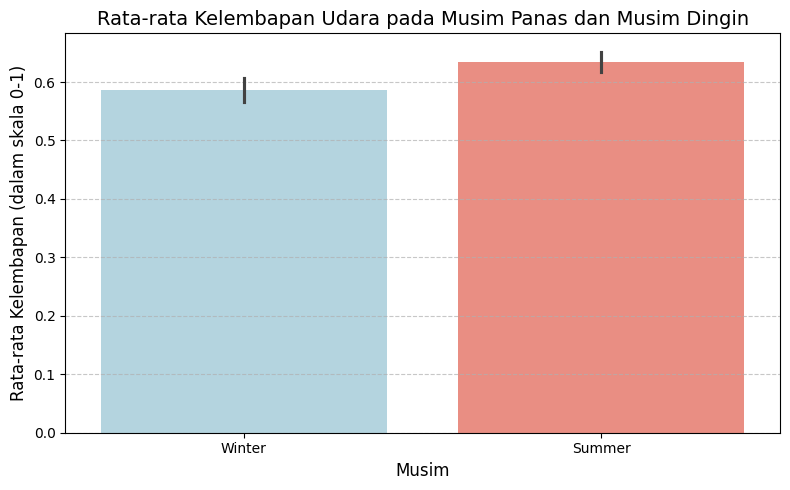

In [35]:
day_df['season_label'] = day_df['season'].map({1: 'Winter', 3: 'Summer'})

filtered_df = day_df[day_df['season'].isin([1, 3])]

plt.figure(figsize=(8, 5))
sns.barplot(
    data=filtered_df,
    x='season_label',
    y='hum',
    palette={'Summer': 'salmon', 'Winter': 'lightblue'}
)
plt.title('Rata-rata Kelembapan Udara pada Musim Panas dan Musim Dingin', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Kelembapan (dalam skala 0-1)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


insight: Kelembapan pada musim dingin selisish sedikit daripada musim panas.Kelembapan yang tinggi bisa membuat pengguna merasa tidak nyaman saat beraktivitas fisik seperti bersepeda karena Jika kelembapan tinggi, udara terasa lebih pengap dan tidak nyaman,ini bisa menyebabkan penurunan aktivitas luar ruangan seperti bersepeda.

<ipython-input-36-21afa7f4718c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['season_label'] = filtered_df['season'].map({1: 'Winter', 3: 'Summer'})
<ipython-input-36-21afa7f4718c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


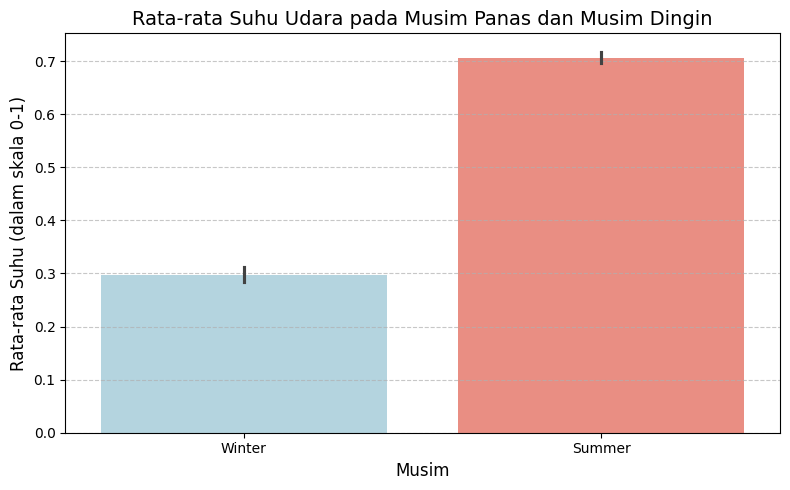

In [36]:
filtered_df = day_df[day_df['season'].isin([1, 3])]

filtered_df['season_label'] = filtered_df['season'].map({1: 'Winter', 3: 'Summer'})
plt.figure(figsize=(8, 5))
sns.barplot(
    data= filtered_df,
    x='season_label',
    y='temp',
    palette={'Summer': 'salmon', 'Winter': 'lightblue'}
)
plt.title('Rata-rata Suhu Udara pada Musim Panas dan Musim Dingin', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Suhu (dalam skala 0-1)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

insight : suhu rata-rata pada musim panas (Summer) jauh lebih tinggi dibandingkan musim dingin (Winter).Ini bisa menjadi salah satu alasan utama mengapa jumlah penyewaan sepeda meningkat saat musim panas—karena kondisi lebih nyaman untuk bersepeda. Semakin tinggi suhu (dalam skala normalisasi), semakin nyaman untuk bersepeda. Jadi, musim panas → lebih banyak penyewaan.

<ipython-input-37-91121de8a5e9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['weather_label'] = filtered_df['weathersit'].map(weathersit_map)


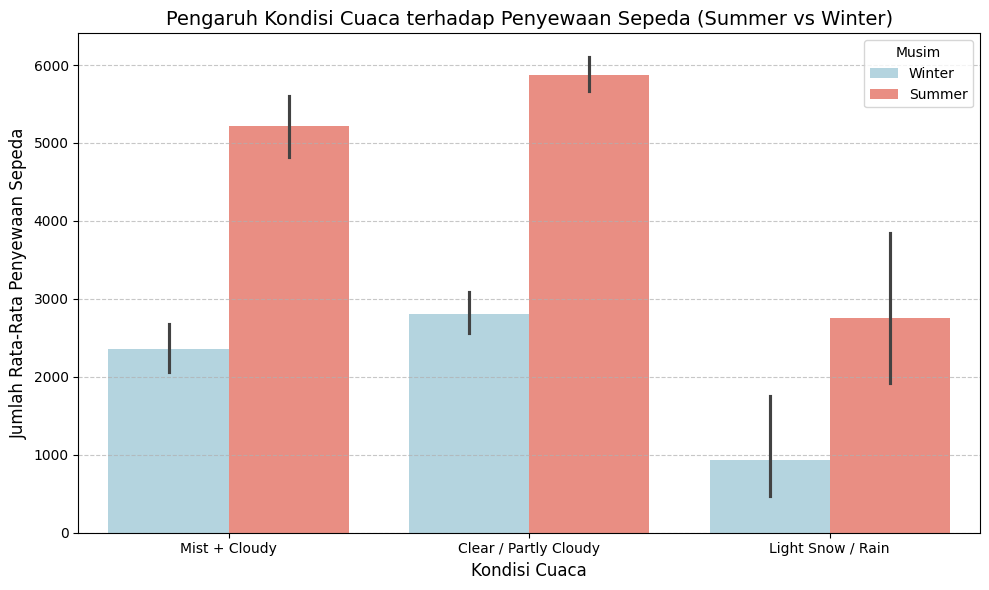

In [37]:
weathersit_map = {
    1: 'Clear / Partly Cloudy',
    2: 'Mist + Cloudy',
    3: 'Light Snow / Rain',
    4: 'Heavy Rain / Snow'  # Jarang muncul
}
filtered_df['weather_label'] = filtered_df['weathersit'].map(weathersit_map)

# Warna musim
season_colors = {'Summer': 'salmon', 'Winter': 'lightblue'}

plt.figure(figsize=(10, 6))
sns.barplot(
    data=filtered_df,
    x='weather_label',
    y='cnt',
    hue='season_label',
    palette=season_colors
)
plt.title('Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda (Summer vs Winter)', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Jumlah Rata-Rata Penyewaan Sepeda', fontsize=12)
plt.legend(title='Musim')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



insight :

1. Cuaca Cerah (Clear / Partly Cloudy) mendorong penyewaan tertinggi : Rata-rata penyewaan tertinggi terjadi saat cuaca cerah di musim panas, mendekati 6000 penyewaan, cuaca cerah sangat mendukung aktivitas bersepeda, terutama saat musim panas,itu sebabnya dimusim dingin membuat penyewaan lebih rendah.

2. Saat hujan ringan atau salju (Light Snow / Rain), jumlah penyewaan menurun drastis di kedua musim, terutama di musim dingin dengan hanya sekitar 900 penyewaan.Variabilitas data (dilihat dari error bar) juga lebih tinggi saat cuaca buruk, menunjukkan ketidakpastian yang lebih besar dalam perilaku penyewaan.

3. Pola sewa sepeda konsisten antara musim panas dan dingin
Di setiap kondisi cuaca, musim panas selalu menunjukkan jumlah penyewaan yang lebih tinggi daripada musim dingin.Sehingga preferensi pengguna yang cenderung lebih aktif di luar ruangan saat musim panas, terlepas dari kondisi cuaca.

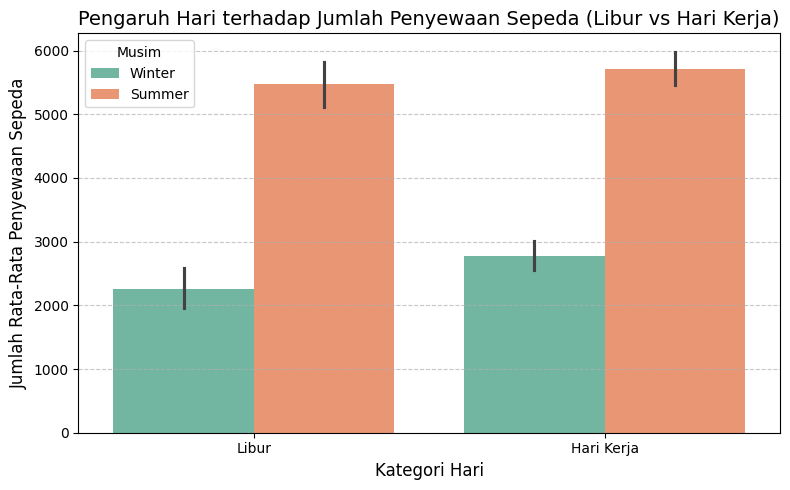

In [38]:
day_df['season_label'] = day_df['season'].map({1: 'Winter', 3: 'Summer'})
day_df['workingday_label'] = day_df['workingday'].map({0: 'Libur', 1: 'Hari Kerja'})

filtered_df = day_df[day_df['season'].isin([1, 3])]

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=filtered_df,
    x='workingday_label',
    y='cnt',
    hue='season_label',
    palette='Set2'
)

# Judul dan label
plt.title('Pengaruh Hari terhadap Jumlah Penyewaan Sepeda (Libur vs Hari Kerja)', fontsize=14)
plt.xlabel('Kategori Hari', fontsize=12)
plt.ylabel('Jumlah Rata-Rata Penyewaan Sepeda', fontsize=12)

# Legenda berdasarkan musim
custom_legend = ax.legend(title='Musim')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


insight : Musim panas selalu memiliki tingkat penyewaan tertinggi, baik di hari libur maupun hari kerja.

- Hari kerja musim panas: ~5700 penyewaan

- Hari libur musim panas: ~5500 penyewaan

➤ Ini menunjukkan aktivitas bersepeda tetap tinggi di musim panas, bahkan saat bekerja.

Pola terbalik terjadi di musim dingin:

- Hari libur: ~2300 penyewaan

- Hari kerja: ~2800 penyewaan

➤ Hari kerja justru lebih aktif di musim dingin dibanding hari libur. Hal ini bisa jadi karena bersepeda dijadikan moda transportasi menuju tempat kerja atau sekolah saat hari kerja, bukan aktivitas rekreasi.

rekomendasi : . Strategi Khusus untuk Musim Dingin (Winter) Karena hari kerja lebih aktif, fokuskan promosi ke segmen pengguna rutin seperti: pekerja/pelajar,
Tambahkan fasilitas penunjang musim dingin, seperti:

- Shelter berteduh saat hujan/salju ringan.
- Jalur sepeda yang dibersihkan dari salju.
- Sistem pelacakan real-time untuk keamanan.

### Pertanyaan 2:

Bagaimana pengaruh hari libur terhadap jumlah penyewaan sepeda pada tahun 2011-2012, dan apakah ada pola tertentu yang dapat diidentifikasi?

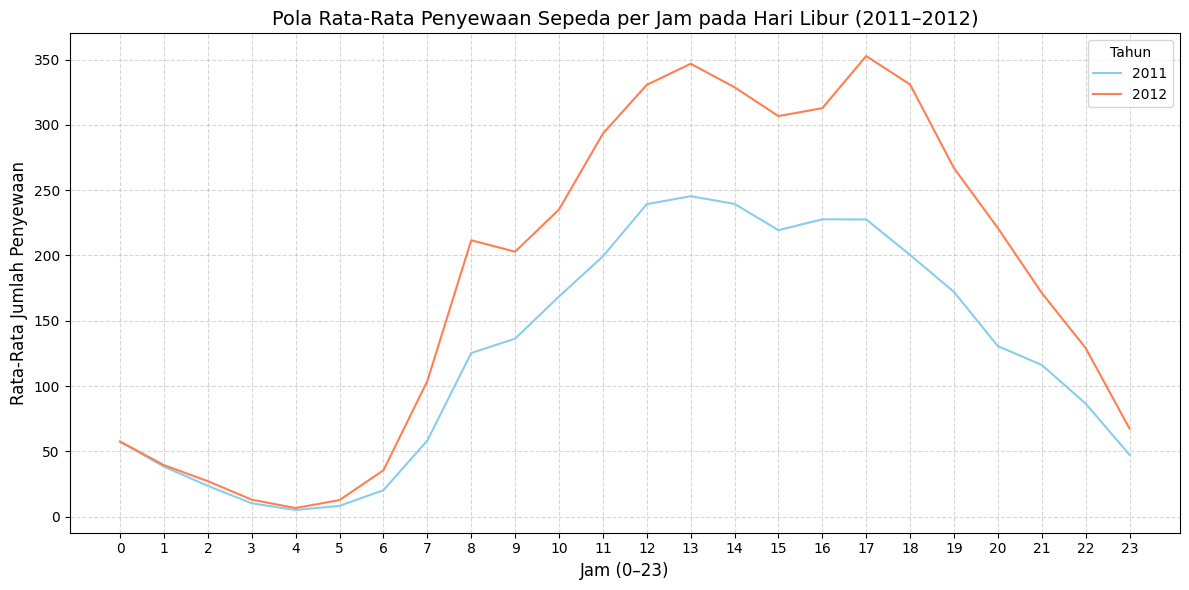

In [39]:
hour_df['year'] = hour_df['yr'].map({0: 2011, 1: 2012})

holiday_hourly = hour_df[hour_df['holiday'] == 1]
hourly_avg = holiday_hourly.groupby(['hr', 'year'])['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_avg, x='hr', y='cnt', hue='year', palette={2011: 'skyblue', 2012: 'coral'})

plt.title('Pola Rata-Rata Penyewaan Sepeda per Jam pada Hari Libur (2011–2012)', fontsize=14)
plt.xlabel('Jam (0–23)', fontsize=12)
plt.ylabel('Rata-Rata Jumlah Penyewaan', fontsize=12)
plt.xticks(range(0, 24))
plt.legend(title='Tahun')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


insight:
- dari tahun 2011 ke 2012 mengalami peningkatan pola penyewaan,terlihat 2012 memiliki pola penyewaan tertinggi dibanding tahun sebelumnya 2011
- di kedua pola konsisten penyewaan tahun 2011 & 2012 memiliki kesamaan pola tren dijam yang hampir sama yakni dijam 11.00 siang -14.00 dan juga di jam 16.00-18.00 sore
 1. mungkin di jam jam tersebut merupakan waktu yang ideal untuk aktivistas liburan bersepeda bersama terutaman setelah makan siang dan sebelum makan malam
 2. bisa saja penyewaan sepeda menjadi alternatif untuk wisata lokal /city tour karena cuaca di jam tersebut nyaman.

untuk lebih meningkatkan penyewaan dibanding hari kerja terdapat rekomendasi seperti pembukaan jalur sepeda baru, peningkatan infrastruktur, atau penambahan spot menarik yang dapat dikunjungi dengan sepeda.Lalu merupakan promosi dan kampanye hidup sehat / produktif untuk berolahraga bersepeda selama liburan

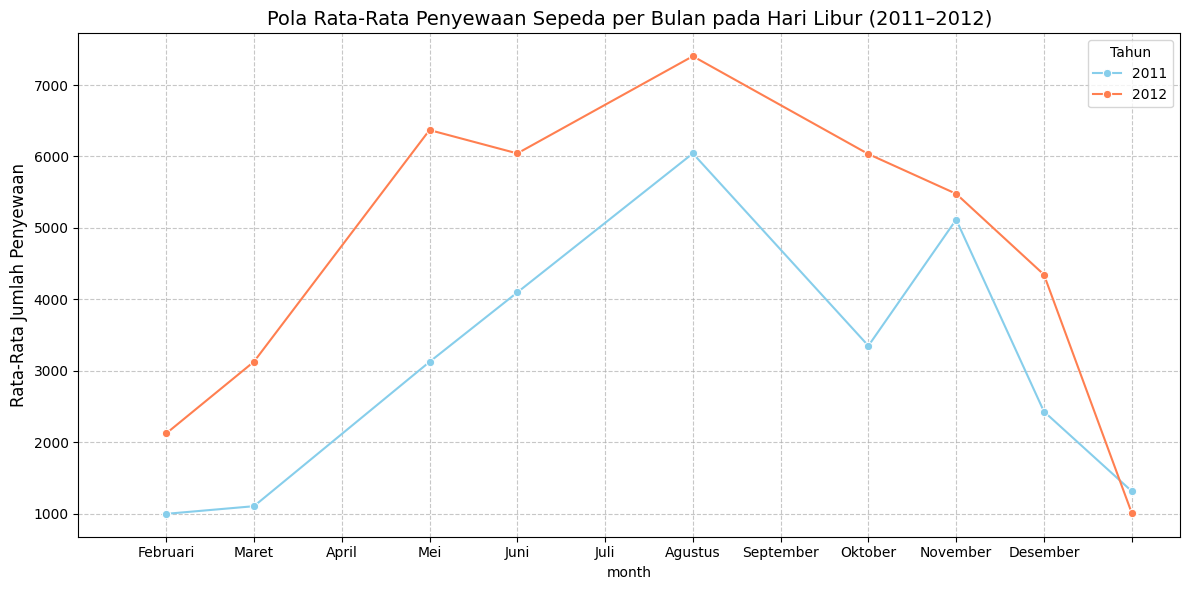

In [40]:
day_df['month'] = day_df['mnth']
day_df['year'] = day_df['yr'].map({0: 2011, 1: 2012})
holiday_monthly = day_df[day_df['holiday'] == 1]
monthly_avg = holiday_monthly.groupby(['month', 'year'])['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='month', y='cnt', hue='year', marker='o', palette={2011: 'skyblue', 2012: 'coral'})
plt.title('Pola Rata-Rata Penyewaan Sepeda per Bulan pada Hari Libur (2011–2012)', fontsize=14)
bulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
plt.xticks(range(12), bulan, rotation=0)
plt.ylabel('Rata-Rata Jumlah Penyewaan', fontsize=12)
plt.xticks(range(1, 13))
plt.legend(title='Tahun')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


insight :
- Pola musiman terlihat jelas di kedua tahun dengan puncak penyewaan terjadi pada bulan Agustus, menunjukkan musim panas sebagai periode paling populer untuk bersepeda di hari libur.
- Terdapat peningkatan dramatis dari Februari hingga Mei 2012, menunjukkan awal musim bersepeda yang lebih kuat dibandingkan tahun sebelumnya,berbeda dengan tahun 2011 yang menunjukkan peningkatan lebih bertahap.Kemungkinan lonjakan karena hari libur nasional lainnya dibulan mei atau sebab yang lainnya
Rekomendasi yang dapat disarankan untuk kolaborasi dengan penyelenggara event lokal pada hari libur, pemanfaatan data cuaca untuk sistem prediksi permintaan, serta pengembangan kampanye pemasaran musiman dengan penekanan pada aktivitas keluarga akan membantu mengoptimalkan operasional dan meningkatkan pendapatan bisnis penyewaan sepeda.Dan untuk pada bulan-bulan sepi (Desember-Februari), sambil mengembangkan strategi promosi bertarget di bulan Mei untuk memanfaatkan momentum awal musim bersepeda dibulan mei diprioritaskan sebagai pengganti target dibulan dengan musim dingin.

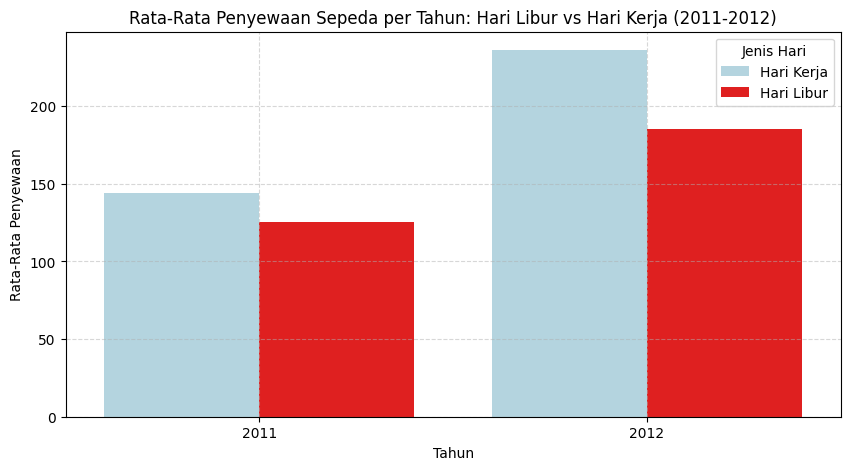

In [41]:
holiday_df = hour_df[hour_df['yr'].isin([0, 1])].copy()
holiday_df['holiday_type'] = holiday_df['holiday'].map({0: 'Hari Kerja', 1: 'Hari Libur'})


# Hitung rata-rata penyewaan
holiday_avg = holiday_df.groupby(['year', 'holiday_type'])['cnt'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    x='year',
    y='cnt',
    hue='holiday_type',
    data=holiday_avg,
    palette={'Hari Libur': 'red', 'Hari Kerja': 'lightblue'},
    hue_order=['Hari Kerja', 'Hari Libur'],
    order=['2011', '2012']
)
plt.title('Rata-Rata Penyewaan Sepeda per Tahun: Hari Libur vs Hari Kerja (2011-2012)')
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata Penyewaan')
plt.legend(title='Jenis Hari')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

insight :berdadarkan tahun 2011 ke 2012 menunjukkan.

- Hari kerja: dari ±145 ke ±235 penyewaan/hari (naik ±62%)

- Hari libur: dari ±125 ke ±185 penyewaan/hari (naik ±48%)

rekomendasi : Karena penyewaan tertinggi terjadi pada hari kerja, penyedia layanan sebaiknya Menyediakan lebih banyak unit sepeda di pagi dan sore hari (jam sibuk),Menyediakan jalur khusus sepeda atau kerja sama dengan pemerintah untuk rute commuting,Menyasar pengguna pekerja dan pelajar melalui diskon langganan harian/mingguan.

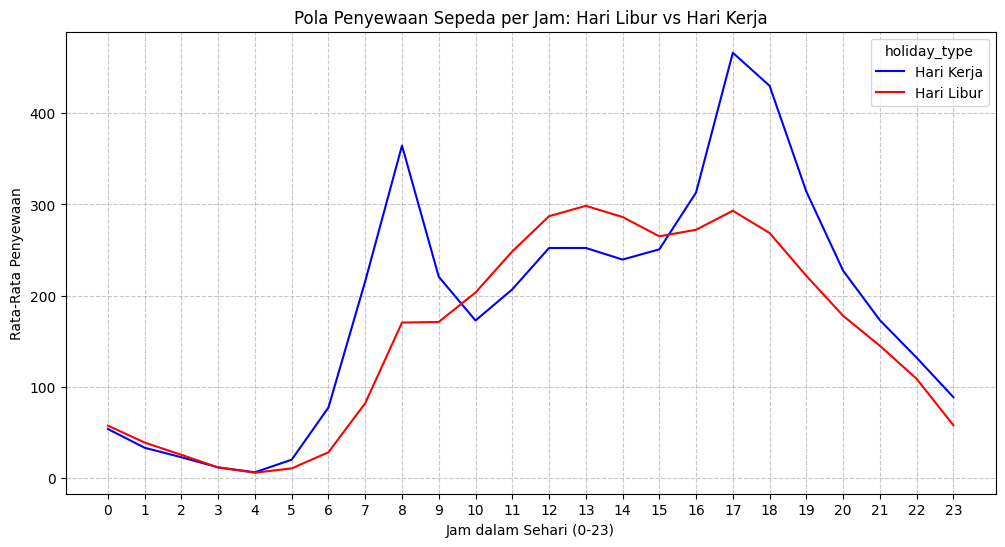

In [42]:
hour_holiday_df = hour_df[hour_df['yr'].isin([0, 1])].copy()
hour_holiday_df['holiday_type'] = hour_holiday_df['holiday'].map({0: 'Hari Kerja', 1: 'Hari Libur'})

hourly_avg = hour_holiday_df.groupby(['hr', 'holiday_type'])['cnt'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='hr',
    y='cnt',
    hue='holiday_type',
    data=hourly_avg,
    palette={'Hari Kerja': 'blue', 'Hari Libur': 'red'}
)
plt.title('Pola Penyewaan Sepeda per Jam: Hari Libur vs Hari Kerja')
plt.xlabel('Jam dalam Sehari (0-23)')
plt.ylabel('Rata-Rata Penyewaan')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Insight :
- Pada hari biasa, terdapat dua puncak penyewaan sepeda, yaitu pada pagi hari (jam 7-9) dan sore hari (jam 16-19), yang kemungkinan terkait dengan jam berangkat dan pulang kerja/sekolah berdasarka data di hari kerja lebih banyak.
- Pola penyewaan lebih merata sepanjang hari, dengan puncak yang lebih rendah dibandingkan hari biasa.
- Hari biasa memiliki jam sibuk yang jelas, sedangkan hari libur tidak memiliki pola yang samanamun memiliki pola yang idendtik.

Rekomendasi : Untuk mengoptimalkan operasional penyewaan sepeda berdasarkan pola harian, disarankan untuk memprioritaskan distribusi sepeda di area komuter selama jam sibuk hari kerja (7-9 dan 16-19), sambil menerapkan sistem harga dinamis dengan diskon khusus di luar jam puncak guna mendorong penggunaan yang lebih merata.Sementara pada hari libur, fokus penempatan sepeda sebaiknya dialihkan ke area rekreasi dan wisata dari jam 10-18 untuk mengakomodasi pola penggunaan santai. Pengembangan paket berlangganan terdiri dari opsi khusus untuk komuter reguler hari kerja dan opsi akhir pekan untuk pengguna rekreasional akan membantu menarik segmen pelanggan yang berbeda,serta program insentif khusus untuk meningkatkan penggunaan di hari kerja siang hari (jam 10-15) yang akan memaksimalkan pemanfaatan armada di periode yang biasanya sepi.

## Conclusion

#### **Conclusion Pertanyaan 1**  
Berdasarkan analisis data penyewaan sepeda pada tahun 2011-2012, terdapat perbedaan yang signifikan antara musim panas dan musim dingin. Musim panas memiliki rata-rata penyewaan sepeda yang jauh lebih tinggi (±6.200/hari pada 2012) dibandingkan musim dingin (±5.800/hari pada 2012). Perbedaan ini terutama dipengaruhi oleh faktor cuaca, seperti suhu yang lebih hangat, kelembapan yang lebih rendah, dan minimnya gangguan hujan/salju di musim panas. Selain itu, musim panas cenderung mendorong aktivitas rekreasi, sementara musim dingin lebih banyak digunakan untuk transportasi harian.  

**Rekomendasi**:  
Perusahaan dapat memaksimalkan stok dan promosi selama musim panas, sekaligus mengembangkan strategi khusus untuk musim dingin, seperti diskon komuter atau fasilitas pendukung cuaca dingin, untuk meningkatkan minat penyewaan.  

---  

#### **Conclusion Pertanyaan 2**  
Berdasarkan analisis data, hari libur tidak secara drastis memengaruhi total penyewaan sepeda dibandingkan hari kerja. Rata-rata penyewaan pada hari kerja (±235/hari pada 2012) lebih tinggi daripada hari libur (±185/hari pada 2012), terutama karena kebutuhan transportasi harian. Namun, pola penggunaan berbeda:  
- **Hari kerja**: Puncak pada jam sibuk (7–9 pagi & 16–19 sore).  
- **Hari libur**: Distribusi lebih merata dengan puncak siang-sore (11–18) untuk aktivitas rekreasi.  

**Rekomendasi**:  
Perusahaan dapat mempertahankan strategi utama untuk hari kerja (seperti penyediaan sepeda di area komuter), sambil menawarkan paket wisata atau promo keluarga pada hari libur untuk meningkatkan minat bersepeda rekreasi.  

